## 在本节的估计问题中使用 𝜆 的值进行实验。绘制训练和测试精度关于 𝜆的函数。观察到了什么？

In [17]:
import torch
from torch import nn
from d2l import torch as d2l
import numpy as np

In [18]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5

true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
# true_w的shape是(200, 1)

train_data = d2l.synthetic_data(true_w, true_b, n_train)
# train_data是一个元组，第一个元素是X，其形状是(20, 200);第二个元素是y，其形状是(20, 1);

train_iter = d2l.load_array(train_data, batch_size)
# train_iter是一个数据迭代器，批次为5

test_data = d2l.synthetic_data(true_w, true_b, n_test)
# test_data是一个元组，第一个元素是X，其形状是(100, 200);第二个元素是y，其形状是(100, 1);

test_iter = d2l.load_array(test_data, batch_size, is_train=False)
# test_iter是一个数据迭代器，批次为5

In [19]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}
    ], lr=lr)
    '''
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    '''
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        '''
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
        '''
    print('w的L2范数：', net[0].weight.norm().item())
    return net, loss

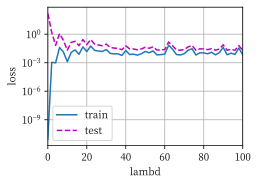

In [21]:
lambd_data = np.arange(0, 101, 2)
animator = d2l.Animator(xlabel='lambd', ylabel='loss', yscale='log',
                            xlim=[0, 100], legend=['train', 'test'])
for lambd in lambd_data:
    # print(lambd)
    net, loss = train_concise(lambd)
    animator.add(
                    lambd,
                    (
                        d2l.evaluate_loss(net, train_iter, loss),
                        d2l.evaluate_loss(net, test_iter, loss)
                    )
                )
    